In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset 
df = pd.read_csv('train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

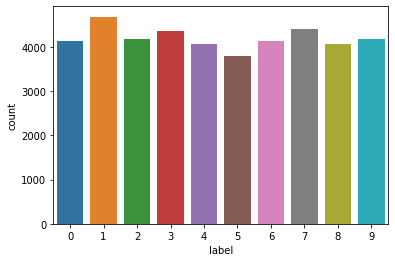

In [5]:
sns.countplot(data=df,x='label')

In [6]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [7]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

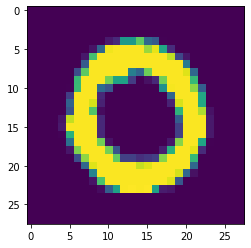

In [8]:
 plt.imshow(x[1].reshape(28,28))

the label of the image is  1


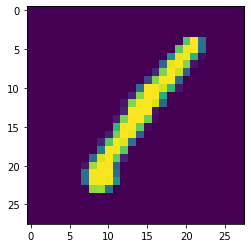

the label of the image is  0


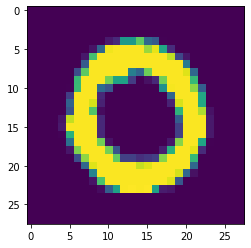

the label of the image is  1


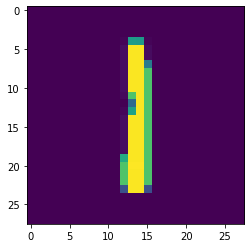

the label of the image is  4


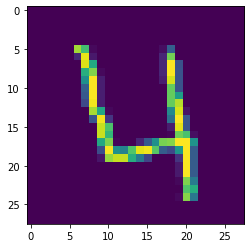

the label of the image is  0


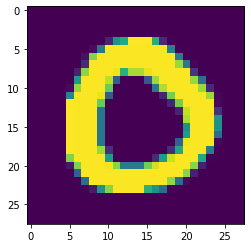

In [9]:
for i in range(5):
    plt.imshow(x[i].reshape(28,28))
    print('the label of the image is ',y[i])
    plt.show()

# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
xtrain.shape,ytrain.shape

((33600, 784), (33600,))

# Feature Scaling

In [13]:
xtrain = xtrain/255
xtest = xtest/255


In [14]:
 xtrain.shape , xtest.shape

((33600, 784), (8400, 784))

# Creating Artificial Neural Network

In [15]:
import keras
from keras.models import  Sequential 
from keras.layers import Dense

In [16]:
#initializing ANN
ann_clf = Sequential()

In [17]:
# Addding First Hidden Layer
ann_clf.add(Dense(activation='relu',input_dim=784,units=128))

In [18]:
# adding final layer
ann_clf.add(Dense(activation='softmax',units=10))

# model compilation

In [19]:
ann_clf.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# model training

In [20]:
history = ann_clf.fit(xtrain,ytrain, validation_split=0.33,batch_size=32,epochs=20)

Epoch 1/20
704/704 [==============================] - 3s 3ms/step - loss: 0.3780 - accuracy: 0.8943 - val_loss: 0.2212 - val_accuracy: 0.9365
Epoch 2/20
704/704 [==============================] - 2s 3ms/step - loss: 0.1798 - accuracy: 0.9476 - val_loss: 0.1626 - val_accuracy: 0.9545
Epoch 3/20
704/704 [==============================] - 2s 3ms/step - loss: 0.1290 - accuracy: 0.9621 - val_loss: 0.1426 - val_accuracy: 0.9593
Epoch 4/20
704/704 [==============================] - 2s 3ms/step - loss: 0.0973 - accuracy: 0.9721 - val_loss: 0.1283 - val_accuracy: 0.9620
Epoch 5/20
704/704 [==============================] - 2s 3ms/step - loss: 0.0734 - accuracy: 0.9790 - val_loss: 0.1201 - val_accuracy: 0.9637
Epoch 6/20
704/704 [==============================] - 2s 3ms/step - loss: 0.0584 - accuracy: 0.9836 - val_loss: 0.1158 - val_accuracy: 0.9655
Epoch 7/20
704/704 [==============================] - 2s 3ms/step - loss: 0.0437 - accuracy: 0.9876 - val_loss: 0.1106 - val_accuracy: 0.9683
Epoch 

# Predicting the test result

In [21]:
y_pred = ann_clf.predict(xtest)

In [22]:
y_pred[0]

array([1.3865504e-09, 2.7812771e-08, 7.7471450e-06, 2.3165123e-07,
       3.7199981e-09, 4.4011141e-13, 1.6210334e-08, 3.3085321e-10,
       9.9999177e-01, 2.3428800e-07], dtype=float32)

In [23]:
np.argmax(y_pred[0])

8

In [24]:
y_predT = y_pred.argmax(axis=1)

# Confusion Matrix 

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(ytest,y_predT)

In [26]:
cm

array([[798,   0,   3,   3,   0,   2,   5,   1,   2,   2],
       [  0, 899,   4,   0,   1,   0,   0,   0,   4,   1],
       [  1,   8, 809,   6,   6,   0,   3,   4,   6,   3],
       [  0,   3,   2, 908,   0,   5,   0,   5,   8,   6],
       [  1,   0,   2,   0, 811,   1,   8,   2,   0,  14],
       [  1,   1,   0,  13,   1, 675,   5,   1,   1,   4],
       [  3,   1,   3,   1,   2,   3, 772,   0,   0,   0],
       [  0,   3,   4,   5,   6,   4,   0, 858,   2,  11],
       [  2,   6,   5,   8,   5,   2,   2,   2, 800,   3],
       [  1,   1,   1,   7,   5,   2,   0,   7,   2, 812]])

In [27]:
acc= accuracy_score(ytest,y_predT)

In [28]:
acc

0.9692857142857143

In [29]:
acc= round(accuracy_score(ytest,y_predT)*100,2)

In [36]:
acc

96.93

# Classification Report 

In [30]:
cr = classification_report(y_predT,ytest)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       807
           1       0.99      0.98      0.98       922
           2       0.96      0.97      0.96       833
           3       0.97      0.95      0.96       951
           4       0.97      0.97      0.97       837
           5       0.96      0.97      0.97       694
           6       0.98      0.97      0.98       795
           7       0.96      0.97      0.97       880
           8       0.96      0.97      0.96       825
           9       0.97      0.95      0.96       856

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



# Plotting Train vs Test  Loss

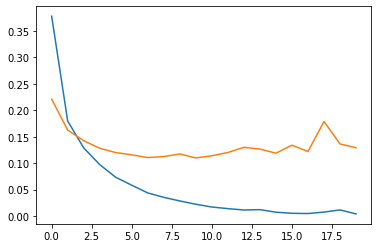

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Plotting Train vs Test Accuracy

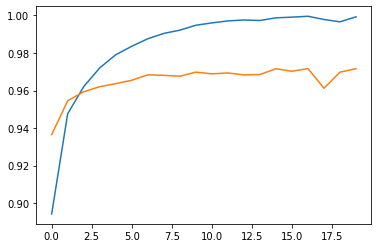

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Testing  Model predicion

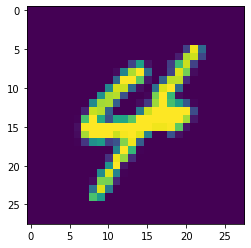

In [33]:
plt.imshow(xtest[100].reshape(28,28))

In [35]:
ann_clf.predict(xtest[100].reshape(1,784)).argmax(axis=1)

array([4])

Accuracy =  **96.93**